<a href="https://colab.research.google.com/github/dssikdar/ASDRP_Quantum_ML-/blob/QCNN_preprocessing/Quantum_Data_Conversion_(MNIST_Grayscale_Images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QCNN Pre-Processing through Encoding Images from MNIST**
---



### This program takes the MNIST dataset and converts the images from a grayscale image to a simple black-and-white image (stored as simply ones and zeros) to encode the dataset for use in QCNN. The results are the two lists of black-and-white images, called 'encodedMnistTrain' and 'encodedMnistTest', with each element being a Image converted to a list.

List of imports used for pre-processing and testing.

In [9]:
import tensorflow as tf #used for converting the images stored as tensors to regular lists
import tensorflow_datasets as tfds #used for loading the MNIST dataset
import numpy #used for convertion of list to Image
import random #used for testing
import matplotlib.pyplot as plt #used for printing out images

Split the MNIST dataset into the training and testing sets for use.

In [10]:
mnistTrain = list( tfds.load( 'mnist' , split = 'train' , shuffle_files = True ) ) #loads the training subset from the
                                                                    #MNIST dataset from tensorflow datasets as a list
mnistTest = list( tfds.load( 'mnist' , split = 'test' , shuffle_files = True ) ) #loads the testing subset from the 
                                                                    #MNIST dataset from tensorflow datasets as a list

#encodeToQuantum() Function


---


##Takes in a list of pixel values of an image and creates a new list of 0's and 1's based on how the pixel compares to the threshold defined (190), thus encoding the pixels into quantum data
### arguments: oldPixVals a list of pixel values that comes from a GRAYSCALE (1 byte per pixel) image
### return:    newVals                a encoded list of 0s and 1s that represent each pixel from the grayscale image

In [11]:
def encodeImageToQuantum( oldPixVals ) : 
    newVals = []

    #sets the newVals lis to the same size and length of the oldPixVals list, which contains the array of pixel values
    for row in range( len( oldPixVals ) ) :
        newVals.append( [] )
        for col in range( len( oldPixVals[ row ] ) ) :
            newVals[ -1 ].append( -1 )
    
    threshold = 190
    
    #runs through each element of the list, accessing the grayscale value, and assign it a value in the new 1-bit list
    # of pixels based on the threshold
    for row in range( len( oldPixVals ) ) :
        for col in range( len( oldPixVals[ row ] ) ) :
            currPixVal = oldPixVals[ row ][ col ]
            if int(currPixVal[ 0 ]) >= threshold :
                newVals[ row ][ col ] = 1
            else :
                newVals[ row ][ col ] = 0
    
    return newVals #returns new list of values

Each image is converted into a 2d array of pixels, and then the encodeImageToQuantum() method is called for each of the images in both the training and testing subsets.

In [12]:
encodedMnistTrain = []


for currImage in range( len( mnistTrain ) ) : #runs through the mnistTrain list to access the index of each image
    oldImage = mnistTrain[ currImage ][ 'image' ] #accesses the image from the mnistTrain list
    oldImage = numpy.array( oldImage , dtype = numpy.uint8 ) #converts image into usable numpy array object
    encodedMnistTrain.append( encodeImageToQuantum( oldImage ) ) #encodes image into 0s and 1s and appends result
                                                                    #to the end of the 'encodedMnistTrain' list

encodedMnistTest = []

#runs through the mnistTest list and converts each image to an encoded version
for currImage in range( len( mnistTest ) ) : 
    oldImage = mnistTest[ currImage ][ 'image' ]
    oldImage = numpy.array( oldImage , dtype = numpy.uint8 )
    encodedMnistTest.append( encodeImageToQuantum( oldImage ) )

#Testing Code
---
##Takes two random images from the training dataset and one from the testing dataset, and shows each image's original form and encoded form. The original form is converted from grayscale, or (x), to RGB values, or (x, x, x). The encoded form is changed into RGB values to be printed, but only two values show up: (255, 255, 255), which is white, or (0, 0, 0), which is black.

###***Example of Output***:

Index #3703 from Training

**Original:**

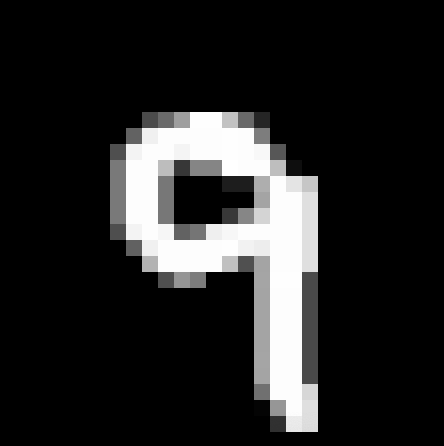

**Encoded:**

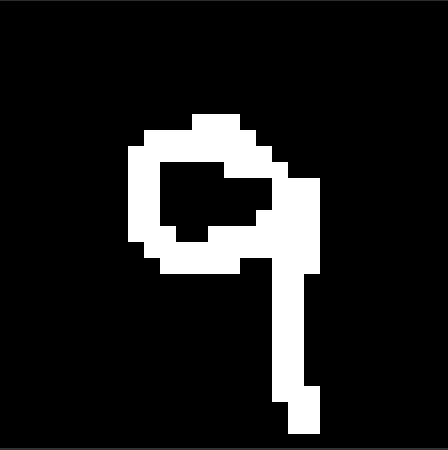

In [13]:
testIndexList = []
testOrigList = []
testEncodeList = []

for i in range(3):
    fromWhichSet = ''
    if i < 2: #uses training set for first two images
        randNum = random.randint( 0 , len( mnistTrain ) ) #generates a random integer from 0 to 60,000 (length of train 
                                                                  #subset)
        randOldImage = mnistTrain[ randNum ][ 'image' ] #takes a random image from the train subset to use for testing
        randNewImage = encodedMnistTrain[ randNum ] #takes the corresponding image from the encoded train subset to use 
                                                        #for testing
        fromWhichSet = ' from Training'
    else: #uses test set for last image
        randNum = random.randint( 0 , len( mnistTest ) ) #generates a random integer from 0 to 60,000 (length of train 
                                                                  #subset)
        randOldImage = mnistTest[ randNum ][ 'image' ] #takes a random image from the train subset to use for testing
        randNewImage = encodedMnistTest[ randNum ] #takes the corresponding image from the encoded train subset to use 
                                                        #for testing
        fromWhichSet = ' from Testing'

    randOldImage = numpy.array( randOldImage , dtype = numpy.uint8 ) #converts image to usable numpy array object
    randNewImage = numpy.array( randNewImage , dtype = numpy.uint8 ) #converts image to usable numpy array object

    newValPixVal = []
    pPixel = []

    #generating original image to print by creating a new array of RGB values, by repeating each value three times 
    # ([value, value, value]) to create an RGB pixel of some shade of gray
    for row in range( len( randOldImage ) ) : #runs through the rows of the image list
        pPixel.append( [] ) #creates a new row when done with the previous row
        for col in range( len( randOldImage[ row ] ) ) : #runs through the columns of the image list
            pPixel[ -1 ].append( [ int( randOldImage[ row ][ col ] ) ,
                                  int( randOldImage[ row ][ col ] ) , 
                                  int( randOldImage[ row ][ col ] ) ] )#appends the new RGB value to the end of newest 
                                                                          #row


    #generating new image to print by multiplying each value by 255, to generate the RGB values of [255, 255, 255]
    # or [0, 0, 0] from the values created by 'encodeImageToQuantum()'
    for row in range( len( randNewImage ) ) :
        newValPixVal.append( [] ) 
        for col in range( len( randNewImage[ row ] ) ) :
            newValPixVal[ -1 ].append( [ randNewImage[ row ][ col ] * 255 , 
                                        randNewImage[ row ][ col ] * 255 , 
                                        randNewImage[ row ][ col ] * 255 ] )

    testIndexList.append('Image #' + str(i+1) + ': ' + str(randNum) + fromWhichSet)

    #converts the pPixel (old Image) array to an Image and displays it as output
    pPixel = numpy.array( pPixel , dtype = numpy.uint8 ) #converts the list into a usable numpy array object
    testOrigList.append(pPixel)
    
    #converts the newValPixVal (new Image) array to an Image and displays it as output
    newValPixVal = numpy.array( newValPixVal , dtype = numpy.uint8 )
    testEncodeList.append(newValPixVal)

###Print out each of the images from the test code.

Image #1: 55724 from Training
Original: 


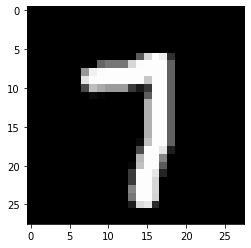

In [14]:
#Image 1
print(testIndexList[0])
print('Original: ')
plt.imshow(testOrigList[0]) #uses the numpy array object print out 

Encoded: 


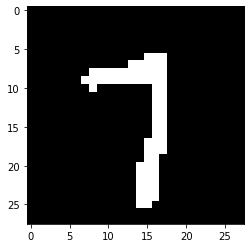

In [15]:
print('Encoded: ')
plt.imshow(testEncodeList[0])

Image #2: 46906 from Training
Original:


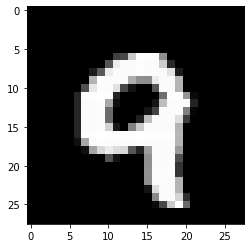

In [16]:
#Image 2
print(testIndexList[1])
print('Original:')
plt.imshow(testOrigList[1])

Encoded: 


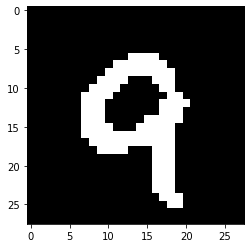

In [17]:
print('Encoded: ')
plt.imshow(testEncodeList[1])

Image #3: 331 from Testing
Original:


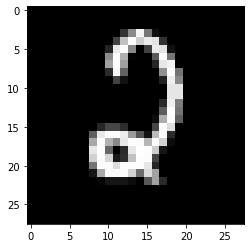

In [18]:
#Image 3
print(testIndexList[2])
print('Original:')
plt.imshow(testOrigList[2])

Encoded: 


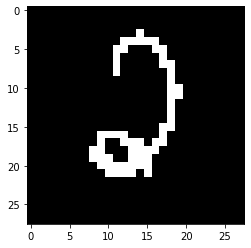

In [19]:
print('Encoded: ')
plt.imshow(testEncodeList[2])